# Bias & Variance

YT video - https://www.youtube.com/watch?v=EuBBz3bI-aA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF

Bias - A model with high bias is too simple, it misses patterns (underfits).

Variance - A model with high variance is complex and has errors from being too sensitive to training data (Overfits).

Bias-Variance Tradeoff - Its the balance between underfitting (high bias) and overfitting (high variance)

### Generate And visualize data

Noise - random variation or error in the data that we can't explain or predict.


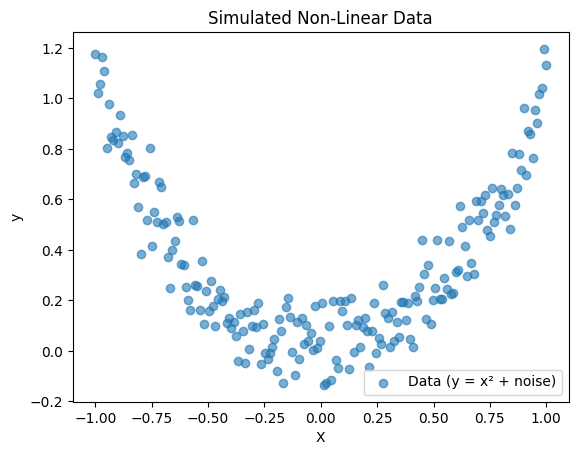

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

# Create inputs X in the range [-1, 1]
X = np.linspace(-1, 1,200).reshape(-1, 1)

# Create outputs y = x² + noise
rng = np.random.RandomState(0)
y = X.ravel()**2 + rng.normal(0, 0.1, size = X.shape[0])

# Plot the data
plt.scatter(X, y, alpha=0.6, label = "Data (y = x² + noise)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simulated Non-Linear Data")
plt.legend()
plt.show() 


### Train-Test Split Data


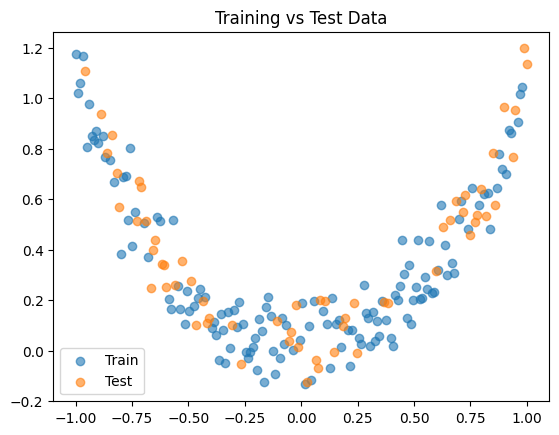

In [5]:
from sklearn.model_selection import train_test_split

# Split into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Plot to visualize the split
plt.scatter(X_train, y_train, label="Train", alpha=0.6)
plt.scatter(X_test, y_test, label="Test", alpha=0.6)
plt.title("Training vs Test Data")
plt.legend()
plt.show()


### Fit Linear Regression And Plot

Linear Train MSE: 0.09762746115343615
Linear Test MSE: 0.12004717800819473


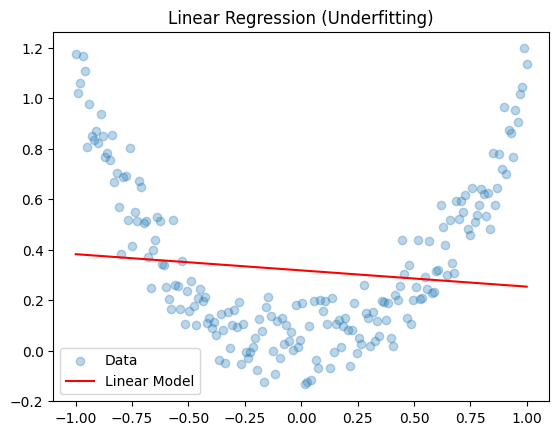

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on train and test
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Print MSE
print("Linear Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Linear Test MSE:", mean_squared_error(y_test, y_pred_test))

# Plot predictions
plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, linear_model.predict(X), label="Linear Model", color='red')
plt.title("Linear Regression (Underfitting)")
plt.legend()
plt.show()



### Fit A Deep Decision Tree

Tree Train MSE: 0.0
Tree Test MSE: 0.017610800701216702


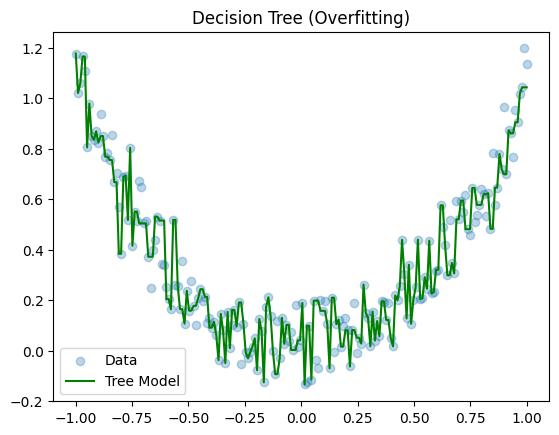

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Train a deep decision tree (no max_depth = very flexible)
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Predict on train and test
y_tree_train = tree_model.predict(X_train)
y_tree_test = tree_model.predict(X_test)

# Print MSE
print("Tree Train MSE:", mean_squared_error(y_train, y_tree_train))
print("Tree Test MSE:", mean_squared_error(y_test, y_tree_test))

# Plot predictions
plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, tree_model.predict(X), label="Tree Model", color='green')
plt.title("Decision Tree (Overfitting)")
plt.legend()
plt.show()


Linear Model - Straight line, misses curve --> high bias
Tree model - Follows every bump --> low bias, but high variance 

### Compare Multiple Models


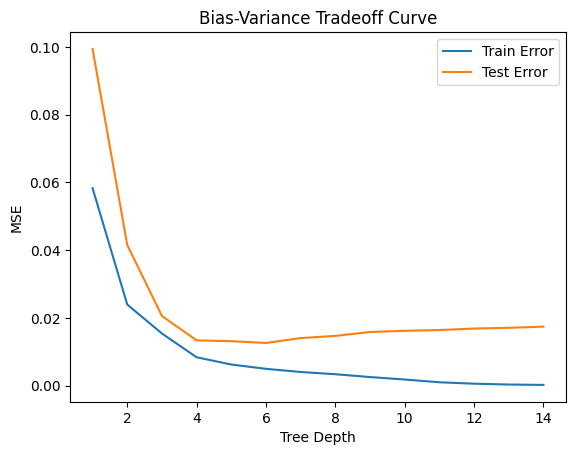

In [8]:
# Try tree models with different max_depth values
depths = range(1, 15)
train_errors = []
test_errors = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=0)
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

# Plot train vs test error
plt.plot(depths, train_errors, label="Train Error")
plt.plot(depths, test_errors, label="Test Error")
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
plt.title("Bias-Variance Tradeoff Curve")
plt.legend()
plt.show()


Low depth = high bias (too simple)

High depth = high variance (too complex)

Best depth = lowest test error → balance between bias and variance.